In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('Raisin_Dataset.xlsx')

In [3]:
X = df.drop(columns = 'Class') # X contains the features 
y= df['Class']
print(X.shape)
X.head()

(900, 7)


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 )

In [5]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X_train, y_train, random_state = 20)
mutual_info

array([0.2686924 , 0.34882192, 0.12463751, 0.1552953 , 0.28891057,
       0.0231814 , 0.36406389])

In [6]:
print(len(mutual_info))
print(X_train.shape)

7
(720, 7)


In [7]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

Perimeter          0.364064
MajorAxisLength    0.348822
ConvexArea         0.288911
Area               0.268692
Eccentricity       0.155295
MinorAxisLength    0.124638
Extent             0.023181
dtype: float64

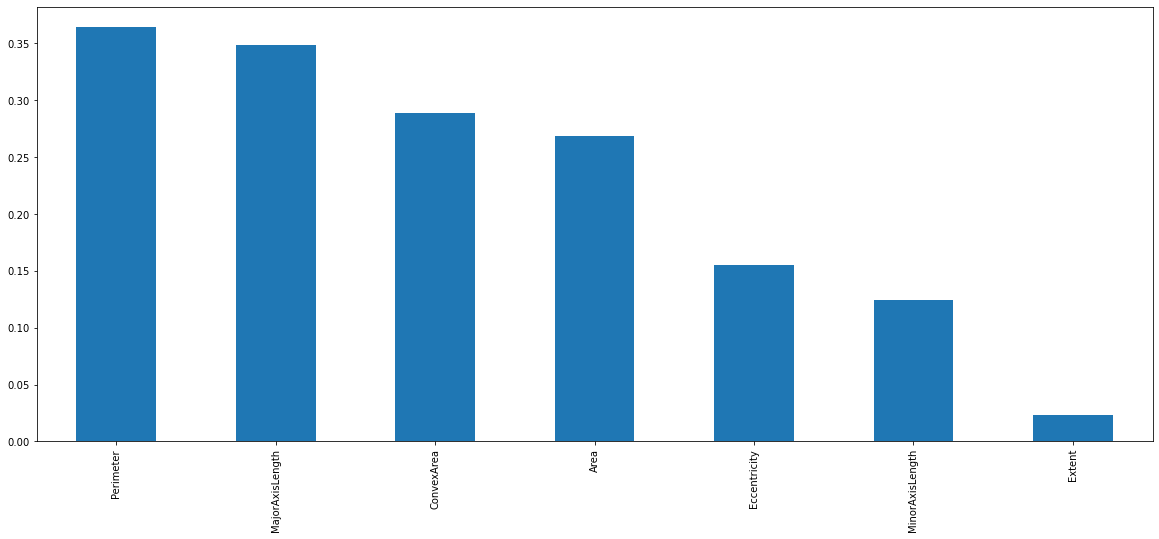

In [8]:
from matplotlib import pyplot as plt
plt.figure(figsize = (20, 8))
mutual_info.sort_values(ascending = False).plot.bar();

In [9]:
X_train = X_train.drop(columns = ['Extent', 'Eccentricity','MinorAxisLength'], axis=1)
X_test = X_test.drop(columns = ['Extent', 'Eccentricity','MinorAxisLength'], axis=1)
# ['C', 'D']

print(X_train.shape)
print(X_test.shape)

(720, 4)
(180, 4)


In [10]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score

Logistic Regression with no regularization
Train Accuracy:  0.8527777777777777
Test Accuracy:  0.8833333333333333
              precision    recall  f1-score   support

       Besni       0.90      0.88      0.89        96
     Kecimen       0.86      0.89      0.88        84

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180



C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


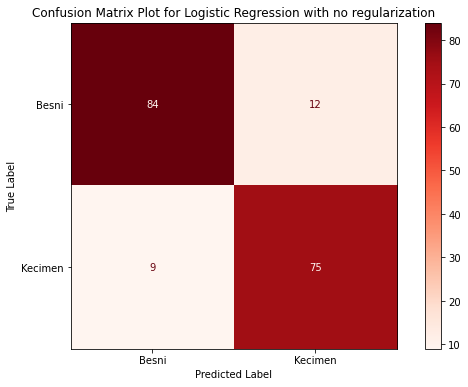


Logistic Regression with L2 regularization
Train Accuracy:  0.8527777777777777
Test Accuracy:  0.8833333333333333
              precision    recall  f1-score   support

       Besni       0.90      0.88      0.89        96
     Kecimen       0.86      0.89      0.88        84

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180



C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


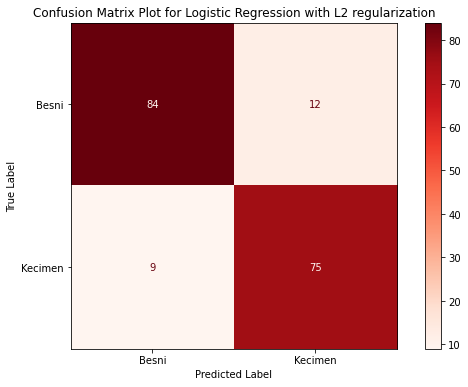

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression(penalty = 'none')

clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Logistic Regression with no regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print(classification_report(y_test,y_pred_test))
matrix = plot_confusion_matrix(clf , X_test, y_test, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for Logistic Regression with no regularization', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()
print()

clf = LogisticRegression(penalty = 'l2')

clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Logistic Regression with L2 regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print(classification_report(y_test,y_pred_test))
matrix = plot_confusion_matrix(clf , X_test, y_test, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for Logistic Regression with L2 regularization', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

Train Accuracy:  1.0
Test Accuracy:  0.8722222222222222
              precision    recall  f1-score   support

       Besni       0.88      0.89      0.88        96
     Kecimen       0.87      0.86      0.86        84

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180



C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


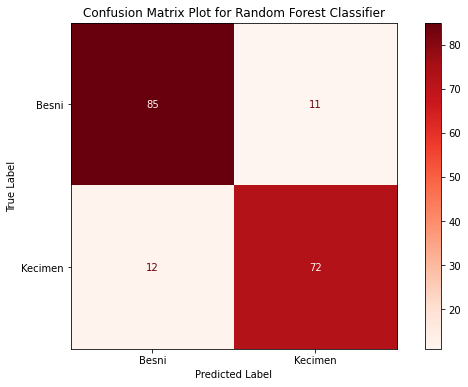

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0).fit(X_train, y_train)
y_pred_train=rf_classifier.predict(X_train)
y_pred_test = rf_classifier.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print(classification_report(y_test,y_pred_test))
matrix = plot_confusion_matrix(rf_classifier , X_test, y_test, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for Random Forest Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

Train Accuracy:  0.7666666666666667
Test Accuracy:  0.7777777777777778
              precision    recall  f1-score   support

       Besni       0.82      0.75      0.78        96
     Kecimen       0.74      0.81      0.77        84

    accuracy                           0.78       180
   macro avg       0.78      0.78      0.78       180
weighted avg       0.78      0.78      0.78       180



C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


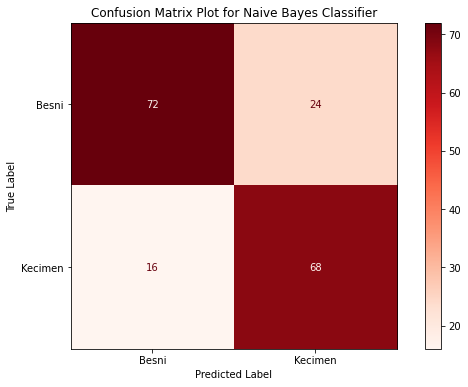

In [13]:
# Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print(classification_report(y_test,y_pred_test))
matrix = plot_confusion_matrix(clf , X_test, y_test, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for Naive Bayes Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.8277777777777777 , Difference =  17.22222222222223 %
K =  5 , Training Accuracy =  0.8611111111111112  Test Accuracy =  0.8611111111111112 , Difference =  0.0 %
K =  10 , Training Accuracy =  0.8597222222222223  Test Accuracy =  0.85 , Difference =  0.9722222222222299 %
K =  15 , Training Accuracy =  0.8430555555555556  Test Accuracy =  0.8444444444444444 , Difference =  0.1388888888888884 %
K =  20 , Training Accuracy =  0.8375  Test Accuracy =  0.85 , Difference =  1.2499999999999956 %
K =  25 , Training Accuracy =  0.8305555555555556  Test Accuracy =  0.8388888888888889 , Difference =  0.8333333333333304 %
K =  30 , Training Accuracy =  0.8236111111111111  Test Accuracy =  0.8333333333333334 , Difference =  0.9722222222222299 %


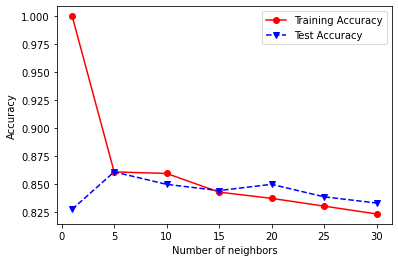

In [17]:
# KNN with Euclidean Distance Metric
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index], 
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

K =  5 , Training Accuracy =  0.8611111111111112  Test Accuracy =  0.8611111111111112 , Difference =  0.0 %


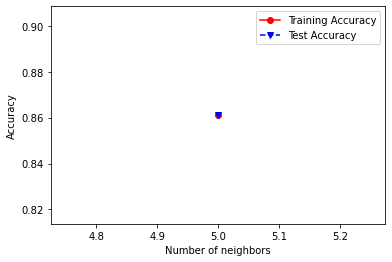

In [18]:
# KNN with Euclidean Distance Metric
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
numNeighbors = [5]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index], 
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.8388888888888889 , Difference =  16.11111111111111 %
K =  5 , Training Accuracy =  0.8680555555555556  Test Accuracy =  0.8611111111111112 , Difference =  0.694444444444442 %
K =  10 , Training Accuracy =  0.8611111111111112  Test Accuracy =  0.8388888888888889 , Difference =  2.2222222222222254 %
K =  15 , Training Accuracy =  0.8444444444444444  Test Accuracy =  0.8444444444444444 , Difference =  0.0 %
K =  20 , Training Accuracy =  0.8361111111111111  Test Accuracy =  0.8388888888888889 , Difference =  0.2777777777777768 %
K =  25 , Training Accuracy =  0.8291666666666667  Test Accuracy =  0.8333333333333334 , Difference =  0.4166666666666652 %
K =  30 , Training Accuracy =  0.8180555555555555  Test Accuracy =  0.8333333333333334 , Difference =  1.5277777777777835 %


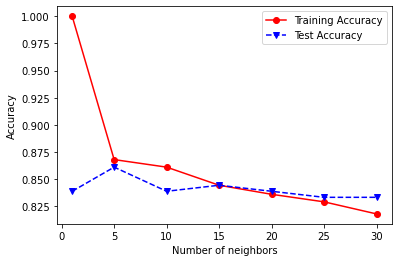

In [19]:
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
    clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index], 
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

K =  15 , Training Accuracy =  0.8444444444444444  Test Accuracy =  0.8444444444444444 , Difference =  0.0 %


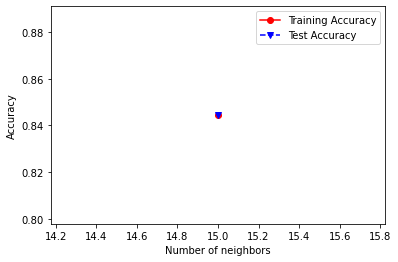

In [20]:
numNeighbors = [15]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
    clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index], 
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

Depth =  2 , Training Accuracy =  0.8625 , Test Accuracy =  0.8777777777777778 , Diff =  1.5277777777777724  %
Depth =  3 , Training Accuracy =  0.875 , Test Accuracy =  0.8666666666666667 , Diff =  0.8333333333333304  %
Depth =  4 , Training Accuracy =  0.8805555555555555 , Test Accuracy =  0.8666666666666667 , Diff =  1.388888888888884  %
Depth =  5 , Training Accuracy =  0.8986111111111111 , Test Accuracy =  0.8722222222222222 , Diff =  2.6388888888888906  %
Depth =  6 , Training Accuracy =  0.9097222222222222 , Test Accuracy =  0.8555555555555555 , Diff =  5.41666666666667  %
Depth =  7 , Training Accuracy =  0.9277777777777778 , Test Accuracy =  0.8611111111111112 , Diff =  6.666666666666665  %
Depth =  8 , Training Accuracy =  0.9388888888888889 , Test Accuracy =  0.8444444444444444 , Diff =  9.444444444444445  %
Depth =  9 , Training Accuracy =  0.95 , Test Accuracy =  0.8388888888888889 , Diff =  11.111111111111105  %
Depth =  10 , Training Accuracy =  0.9652777777777778 , Test

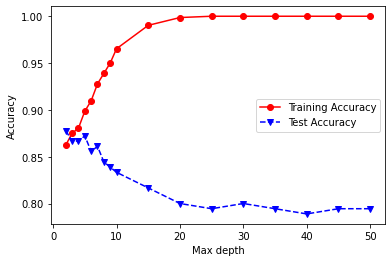

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]# trees of different max depth
trainAcc = np.zeros(len(maxdepths))# makes a list of array of same size as max depth
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:# 2 then 3 then .....
    clf = DecisionTreeClassifier(max_depth=depth)# 2 then 3....
    clf = clf.fit(X_train, y_train)# clf=decision tree classifier
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_train, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_predTest)
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Test Accuracy = ", testAcc[index], 
          ", Diff = ", np.abs((trainAcc[index]-testAcc[index])*100), " %")
    index += 1

    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy');

Train Accuracy:  1.0
Test Accuracy:  0.7944444444444444
              precision    recall  f1-score   support

       Besni       0.80      0.81      0.81        96
     Kecimen       0.78      0.77      0.78        84

    accuracy                           0.79       180
   macro avg       0.79      0.79      0.79       180
weighted avg       0.79      0.79      0.79       180



C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


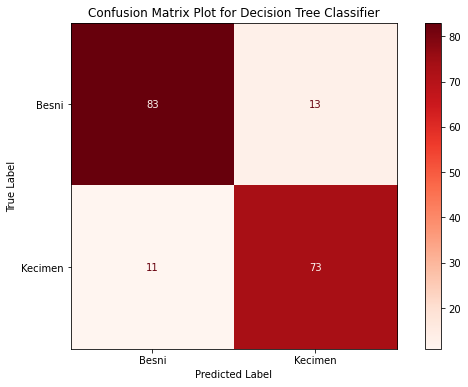

In [22]:
dt = DecisionTreeClassifier(max_depth = 3, random_state=1)
dt.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print(classification_report(y_test,y_pred_test))
matrix = plot_confusion_matrix(dt , X_test, y_test, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for Decision Tree Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

In [23]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [24]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model rf=random forest, n_iter = number of iteration
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [25]:
rf_randomcv.best_estimator_

RandomForestClassifier(max_depth=120, max_features='log2', min_samples_leaf=4,
                       min_samples_split=5, n_estimators=1400)

In [26]:
best_random_grid=rf_randomcv.best_estimator_

In [27]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[84 12]
 [13 71]]
Accuracy Score 0.8611111111111112
Classification report:               precision    recall  f1-score   support

       Besni       0.87      0.88      0.87        96
     Kecimen       0.86      0.85      0.85        84

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180



In [28]:
rf_randomcv.best_params_

{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 120,
 'criterion': 'gini'}

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['gini'], 'max_depth': [120], 'max_features': ['log2'], 'min_samples_leaf': [4, 6, 8], 'min_samples_split': [3, 4, 5, 6, 7], 'n_estimators': [1200, 1300, 1400, 1500, 1600]}


In [30]:
#### Fit the grid_search to the data
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [120],
                         'max_features': ['log2'],
                         'min_samples_leaf': [4, 6, 8],
                         'min_samples_split': [3, 4, 5, 6, 7],
                         'n_estimators': [1200, 1300, 1400, 1500, 1600]},
             verbose=2)

In [31]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=120, max_features='log2', min_samples_leaf=8,
                       min_samples_split=3, n_estimators=1500)

In [32]:
best_grid=grid_search.best_estimator_

In [33]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 120,
 'max_features': 'log2',
 'min_samples_leaf': 8,
 'min_samples_split': 3,
 'n_estimators': 1500}

In [34]:
best_grid

RandomForestClassifier(max_depth=120, max_features='log2', min_samples_leaf=8,
                       min_samples_split=3, n_estimators=1500)

In [35]:
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[85 11]
 [12 72]]
Accuracy Score 0.8722222222222222
Classification report:               precision    recall  f1-score   support

       Besni       0.88      0.89      0.88        96
     Kecimen       0.87      0.86      0.86        84

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180



# The End